<a href="https://colab.research.google.com/github/GabrielRezende079/Image-Detection-AI/blob/main/Pontos_basketball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Wed Jul  3 12:05:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install Pillow

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
from ultralytics import YOLO

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cm3gxCXpktt4FhR88etk")
project = rf.workspace("roboflow-universe-projects").project("basketball-players-fy4c2")
version = project.version(22)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.48, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Basketball-Players-22 in yolov8:: 100%|██████████| 248/248 [00:00<00:00, 2802.70it/s]


# **20 epochs**

In [ ]:
!yolo task=detect mode=train data=/content/Basketball-Players-22/data.yaml epochs=20 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 119MB/s]
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Basketball-Players-22/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/Basketball-Players-22/data.yaml imgsz=640 conf=0.45 save=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 564, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 149, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 230, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 855, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 781, in torch_safe_load
    ckpt = torch.load(fi

In [ ]:
def mostrar(img):
      fig = plt.gcf()
      fig.set_size_inches(16, 10)
      plt.axis("off")
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.show()

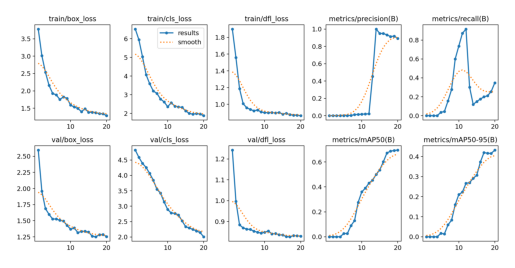

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Verificar se o arquivo existe antes de tentar lê-lo
import os
if os.path.exists("/content/runs/detect/train/results.png"):
    resultados_grafico = cv2.imread("/content/runs/detect/train/results.png")

    # Converter a imagem de BGR para RGB apenas se a leitura foi bem-sucedida
    if resultados_grafico is not None:
        resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

        # Mostrar a imagem
        plt.imshow(resultados_grafico)
        plt.axis('off')  # Ocultar os eixos
        plt.show()
    else:
        print("Erro ao ler a imagem. Verifique o caminho do arquivo.")
else:
    print("O arquivo não existe.")

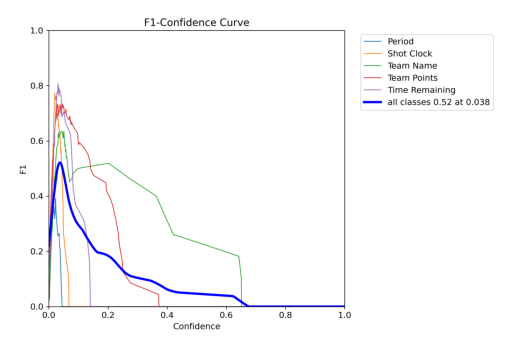

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train/F1_curve.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

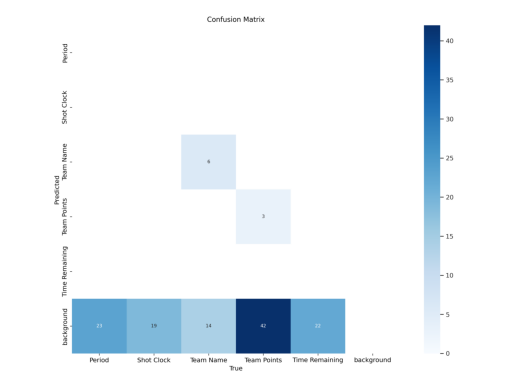

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train/confusion_matrix.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

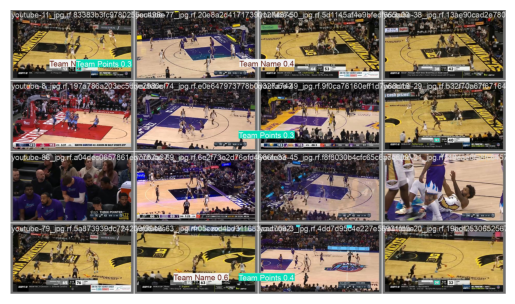

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train/val_batch0_pred.jpg")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

# **40 epochs**

In [ ]:
!yolo task=detect mode=train data=/content/Basketball-Players-22/data.yaml epochs=40 imgsz=640

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Basketball-Players-22/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

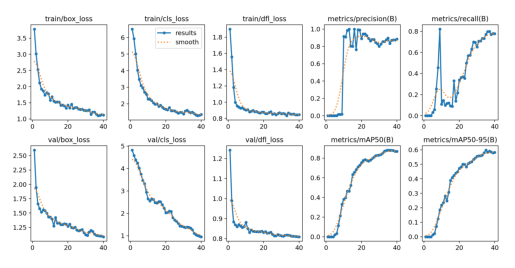

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train2/results.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

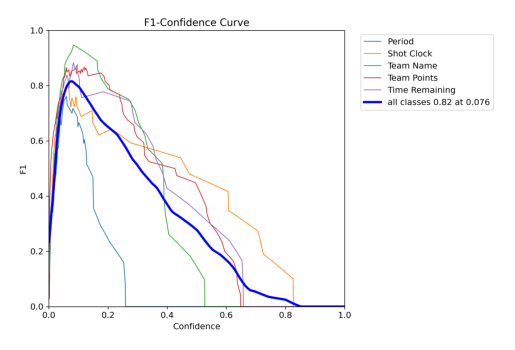

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train2/F1_curve.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

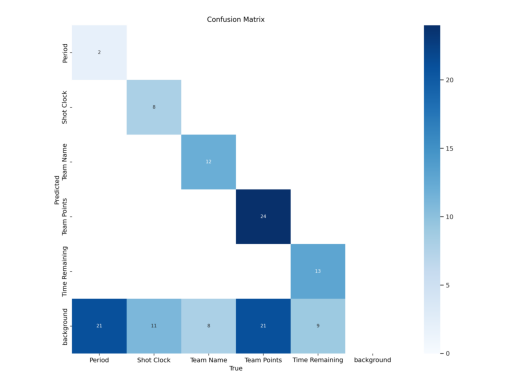

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train2/confusion_matrix.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

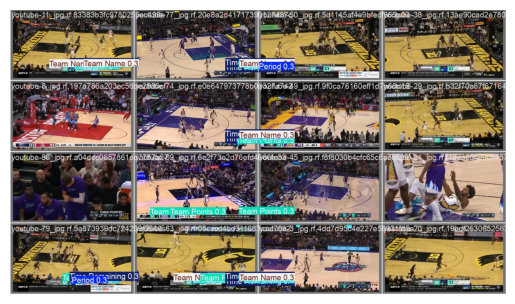

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train2/val_batch0_pred.jpg")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

# **60 epochs**

In [ ]:
!yolo task=detect mode=train data=/content/Basketball-Players-22/data.yaml epochs=60 imgsz=640

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Basketball-Players-22/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

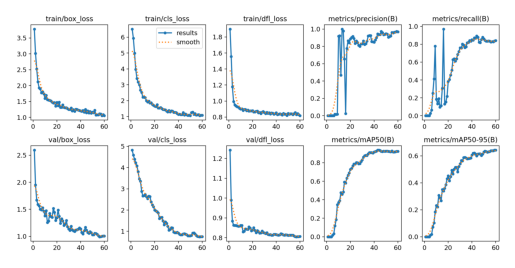

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train3/results.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

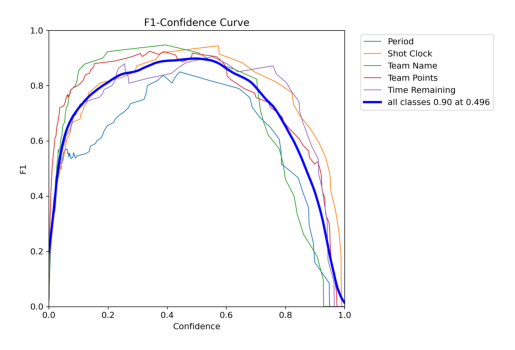

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train3/F1_curve.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

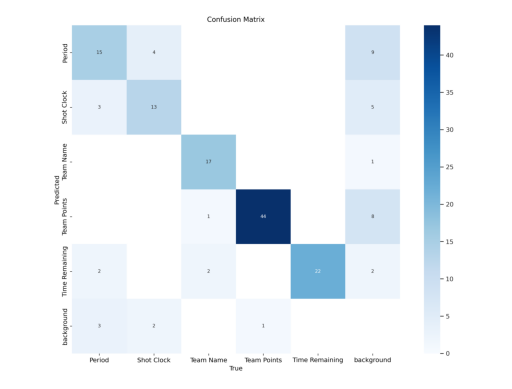

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train3/confusion_matrix.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

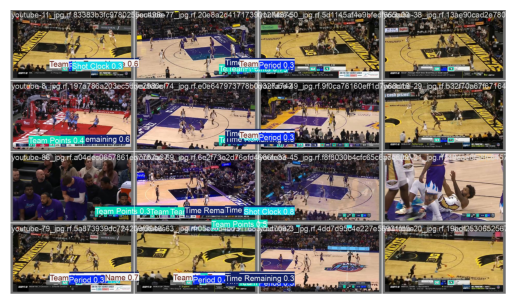

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train3/val_batch0_pred.jpg")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/Basketball-Players-22/data.yaml imgsz=640 conf=0.45 save=True

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Basketball-Players-22/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100% 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.48s/it]
                   all         22        129       0.98      0.829      0.909      0.671
                Period         22         23          1      0.696      0.848      0.582
            Shot Clock         19         19          1      0.895      0.947      0.675
             Team Name         10         20          1       0.85      0.925      0.684
           Team Points         22         45      0.974       0.84      0.902      0.733
        Time Remaining         22         22      0.926      0.864      0.921      0.679
Speed: 4.5ms preprocess, 16.5ms inference, 0

# **80 epochs with the bests weights**

In [ ]:
!yolo task=detect mode=train model=/content/runs/detect/train3/weights/best.pt data=/content/Basketball-Players-22/data.yaml epochs=80 imgsz=640 save=True conf=0.50

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train3/weights/best.pt, data=/content/Basketball-Players-22/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.5, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

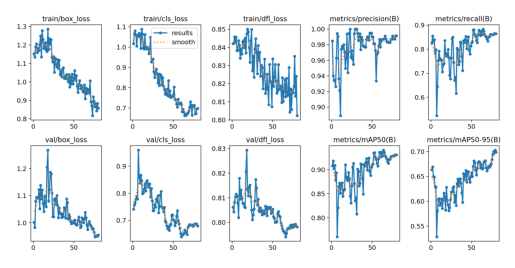

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train4/results.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

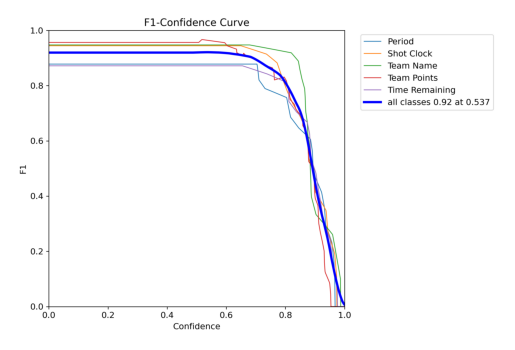

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train4/F1_curve.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

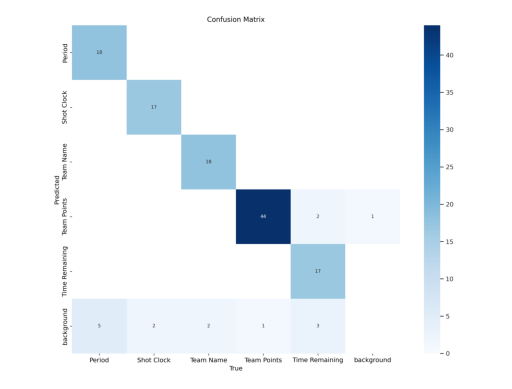

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train4/confusion_matrix.png")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

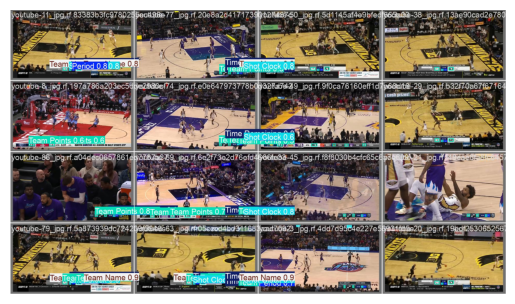

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train4/val_batch0_pred.jpg")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

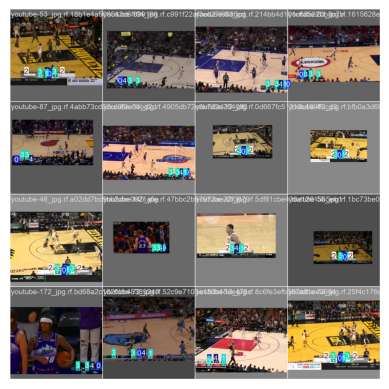

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train4/train_batch352.jpg")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()

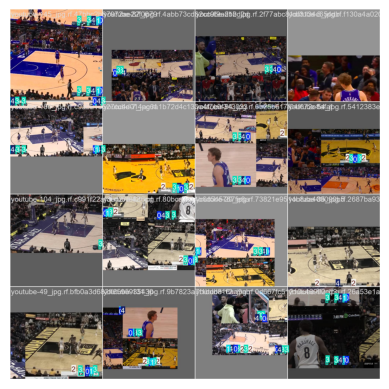

In [ ]:
resultados_grafico = cv2.imread("/content/runs/detect/train4/train_batch2.jpg")

# Converter a imagem de BGR para RGB
resultados_grafico = cv2.cvtColor(resultados_grafico, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(resultados_grafico)
plt.axis('off')  # Ocultar os eixos
plt.show()